# 3 Degrees Of Freedome (DOF)

In [1]:
%matplotlib inline
import sympy as sym
import sympy.physics.mechanics as me
from sympy import init_printing
init_printing(use_latex='mathjax')

from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt


<img src="3dof.png" width="400" align="left">

In [2]:
x0,y0,psi,x,y,beta,x,y,u,v,r,V = me.dynamicsymbols(r'x0 y0 \psi x y \beta x y u v r V')
m,Izz,t = sym.symbols(r'm Izz t')

In [3]:
earth_frame = me.ReferenceFrame(name = 'E')
ship_frame = me.ReferenceFrame(name = 'S')
ship_frame.orient(parent = earth_frame,rot_type='Axis',amounts = (psi,earth_frame.z))
#ship_frame.set_ang_vel(otherframe=earth_frame,value = r*earth_frame.z)

In [4]:
ship_frame.dcm(otherframe=earth_frame)

⎡cos(\psi(t))   sin(\psi(t))  0⎤
⎢                              ⎥
⎢-sin(\psi(t))  cos(\psi(t))  0⎥
⎢                              ⎥
⎣      0             0        1⎦

In [5]:
O0 = me.Point('O0')
O0.set_vel(frame = earth_frame,value = 0)

O = me.Point('O')
#O.set_pos(otherpoint=O0,value = x0*earth_frame.x + y0*earth_frame.y)
O.set_pos(otherpoint=O0,value = x*ship_frame.x + y*ship_frame.y)

O.set_vel(frame = ship_frame,value = u*ship_frame.x + v*ship_frame.y)

O.v1pt_theory(otherpoint=O0,outframe=earth_frame,interframe=ship_frame)

⎛            d          ⎞       ⎛            d          ⎞
⎜u(t) - y(t)⋅──(\psi(t))⎟ s_x + ⎜v(t) + x(t)⋅──(\psi(t))⎟ s_y
⎝            dt         ⎠       ⎝            dt         ⎠

In [6]:
O.pos_from(O0)

x(t) s_x + y(t) s_y

In [7]:
O.vel(earth_frame).express(earth_frame)

⎛⎛            d          ⎞                ⎛            d          ⎞
⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅cos(\psi(t)) - ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅sin(\psi(t
⎝⎝            dt         ⎠                ⎝            dt         ⎠

  ⎞       ⎛⎛            d          ⎞                ⎛            d          ⎞
))⎟ e_x + ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅sin(\psi(t)) + ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅
  ⎠       ⎝⎝            dt         ⎠                ⎝            dt         ⎠

            ⎞
cos(\psi(t))⎟ e_y
            ⎠

In [8]:
O.acc(earth_frame).express(earth_frame)

⎛  ⎛                                               2
⎜  ⎜⎛            d          ⎞ d                   d             d           d
⎜- ⎜⎜u(t) - y(t)⋅──(\psi(t))⎟⋅──(\psi(t)) + x(t)⋅───(\psi(t)) + ──(\psi(t))⋅──
⎜  ⎜⎝            dt         ⎠ dt                   2            dt          dt
⎝  ⎝                                             dt

                 ⎞                ⎛
         d       ⎟                ⎜  ⎛            d          ⎞ d
(x(t)) + ──(v(t))⎟⋅sin(\psi(t)) + ⎜- ⎜v(t) + x(t)⋅──(\psi(t))⎟⋅──(\psi(t)) - y
         dt      ⎟                ⎜  ⎝            dt         ⎠ dt
                 ⎠                ⎝

      2                                           ⎞             ⎞       ⎛⎛
     d             d           d          d       ⎟             ⎟       ⎜⎜⎛
(t)⋅───(\psi(t)) - ──(\psi(t))⋅──(y(t)) + ──(u(t))⎟⋅cos(\psi(t))⎟ e_x + ⎜⎜⎜u(t
      2            dt          dt         dt      ⎟             ⎟       ⎜⎜⎝
    dt                                            ⎠             ⎠    

In [9]:
kinematical_differential_equations = [u - x.diff(),
                                      v - y.diff(),
                                      r - psi.diff()]
coordinates = [x,y,psi,]
speeds = [u,v,r,]

In [10]:
kane = me.KanesMethod(earth_frame,coordinates, speeds,kinematical_differential_equations)

In [11]:
forces = 1*ship_frame.x
mass = me.Particle('m', O, m)

In [12]:
inertia_dyadic = me.inertia(ship_frame, ixx = 0, iyy = 0, izz = Izz)
inertia_dyadic

Izz s_z⊗s_z

In [13]:
inertia = (inertia_dyadic, O)

In [14]:
ship = me.RigidBody('ship',masscenter=O,frame = ship_frame,mass = mass,inertia=inertia)

In [15]:
fr, frstar = kane.kanes_equations(bodies = [ship],loads = [(O, forces)])

In [16]:
M = kane.mass_matrix_full 
M

⎡1  0  0     0       0                0           ⎤
⎢                                                 ⎥
⎢0  1  0     0       0                0           ⎥
⎢                                                 ⎥
⎢0  0  1     0       0                0           ⎥
⎢                                                 ⎥
⎢0  0  0     m       0             -m⋅y(t)        ⎥
⎢                                                 ⎥
⎢0  0  0     0       m             m⋅x(t)         ⎥
⎢                                                 ⎥
⎢                                  ⎛ 2       2   ⎞⎥
⎣0  0  0  -m⋅y(t)  m⋅x(t)  Izz + m⋅⎝x (t) + y (t)⎠⎦

In [17]:
f = kane.forcing_full
f

⎡                                                u(t)                         
⎢                                                                             
⎢                                                v(t)                         
⎢                                                                             
⎢                                                r(t)                         
⎢                                                                             
⎢                           -m⋅(-(r(t)⋅x(t) + v(t))⋅r(t) - r(t)⋅v(t)) + 1     
⎢                                                                             
⎢                             -m⋅((-r(t)⋅y(t) + u(t))⋅r(t) + r(t)⋅u(t))       
⎢                                                                             
⎣m⋅(-(r(t)⋅x(t) + v(t))⋅r(t) - r(t)⋅v(t))⋅y(t) - m⋅((-r(t)⋅y(t) + u(t))⋅r(t) +

                       ⎤
                       ⎥
                       ⎥
                       ⎥
                       ⎥
     

In [18]:
(M.inv() * f)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢    3                                                        2               
⎢   m ⋅((-r(t)⋅y(t) + u(t))⋅r(t) + r(t)⋅u(t))⋅x(t)⋅y(t)      m ⋅(m⋅(-(r(t)⋅x(t
⎢───────────────────────────────────────────────────────── + ─────────────────
⎢   3  2        ⎛   2  2        ⎛        ⎛ 2       2   ⎞⎞⎞                    
⎢- m ⋅x (t) + m⋅⎝- m ⋅y (t) + m⋅⎝Izz + m⋅⎝x (t) + y (t)⎠⎠⎠                    
⎢                                                                             
⎢                  2                                

## Create a PyDy system

In [19]:
constants = {
    m:1,
    Izz:1,
}

initial_conditions = {
    x:0,
    y:0,
    psi:0,
    u:0,
    v:0,
    r:0,
    
}

times = np.linspace(0,10,100)

sys = System(kane,constants=constants,initial_conditions=initial_conditions,times = times)

In [20]:
result = sys.integrate()

Text(0,0.5,'x [m]')

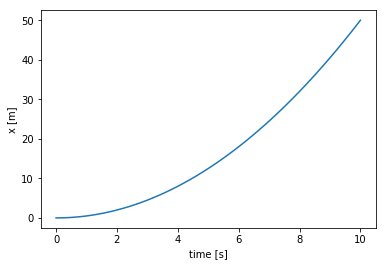

In [21]:
fig,ax = plt.subplots()
ax.plot(times,result[:,0])
ax.set_xlabel('time [s]')
ax.set_ylabel('x [m]')

In [22]:
p = O.pos_from(O0).express(earth_frame)
x0_ = p.dot(ship_frame.x)
x0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅sin(\psi(t)) + (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅cos(\psi(t))

In [23]:
y0_ = p.dot(ship_frame.y)
y0_

(x(t)⋅sin(\psi(t)) + y(t)⋅cos(\psi(t)))⋅cos(\psi(t)) - (x(t)⋅cos(\psi(t)) - y(
t)⋅sin(\psi(t)))⋅sin(\psi(t))

In [24]:
f_x0 = sym.lambdify((x,y,psi,t),x0_,"numpy")
f_y0 = sym.lambdify((x,y,psi,t),y0_,"numpy")


In [25]:
x0_sim = f_x0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'x0 [m]')

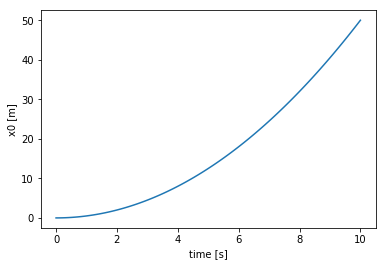

In [26]:
fig,ax = plt.subplots()
ax.plot(times,x0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('x0 [m]')

In [27]:
y0_sim = f_y0(result[:,0],result[:,1],result[:,2],times)

Text(0,0.5,'y0 [m]')

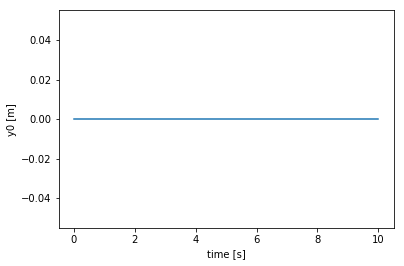

In [28]:
fig,ax = plt.subplots()
ax.plot(times,y0_sim)
ax.set_xlabel('time [s]')
ax.set_ylabel('y0 [m]')

Text(0,0.5,'x0 [m]')

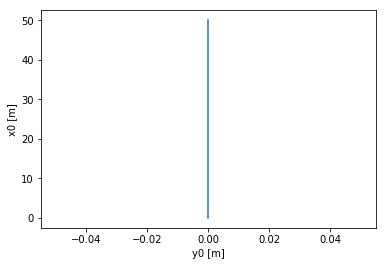

In [29]:
fig,ax = plt.subplots()
ax.plot(y0_sim,x0_sim)
ax.set_xlabel('y0 [m]')
ax.set_ylabel('x0 [m]')
